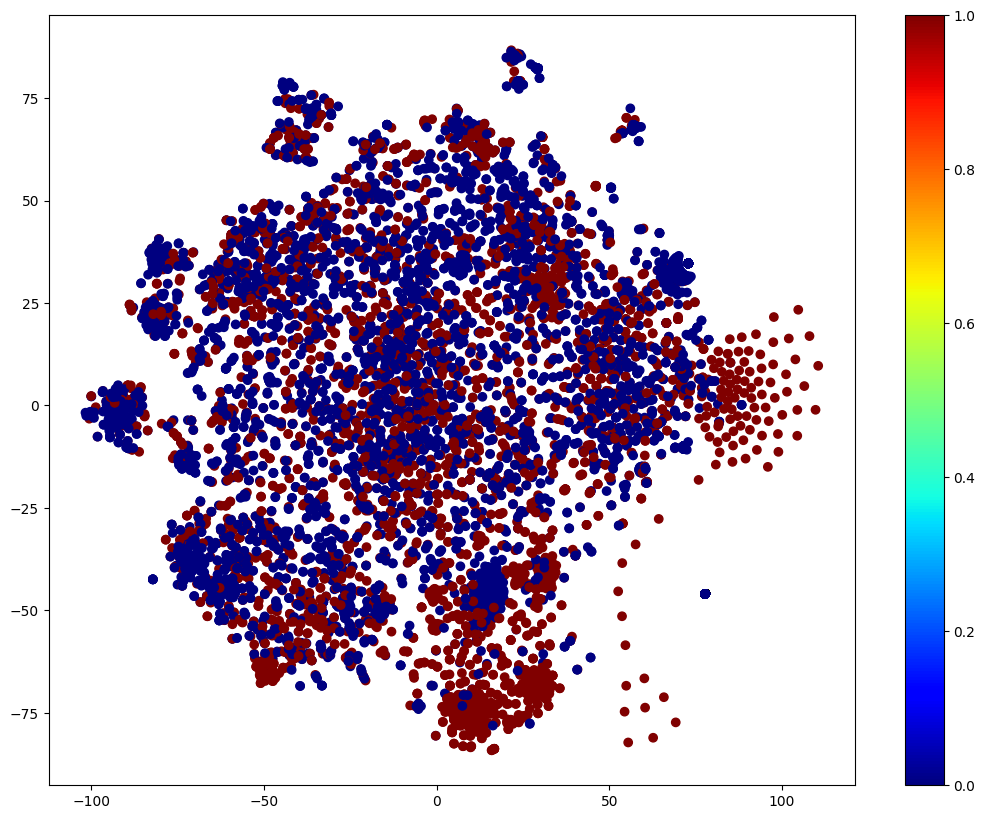

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import numpy as np
# os.environ["OPENBLAS_NUM_THREADS"] = "1"  # 必要に応じてスレッド数を設定

def plot_tsne(x, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(13, 10))
    plt.clf()
    tsne = TSNE()
    x_embedded = tsne.fit_transform(x)
    plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, cmap='jet')
    plt.colorbar()
    plt.show()

# t-SNEによるベクトル分布表示
import torch
z_test = torch.load('z_test2.pt', map_location=torch.device('cpu'))
y_test = torch.load('y_test2.pt', map_location=torch.device('cpu'))
z_test_np = z_test.numpy()                    
y_test_np = y_test.numpy()

plot_tsne(z_test_np, y_test_np)


In [7]:
import torch
z_train = torch.load('z_train2.pt', map_location=torch.device('cpu'))
y_train = torch.load('y_train2.pt', map_location=torch.device('cpu'))
z_test = torch.load('z_test2.pt', map_location=torch.device('cpu'))
y_test = torch.load('y_test2.pt', map_location=torch.device('cpu'))
z_train_np = z_train.to('cpu').detach().numpy().copy()                    # t-SNEはdeviceとしてCPUのみに対応（GPUはダメ）
y_train_np = y_train.to('cpu').detach().numpy().copy()
z_test_np = z_test.to('cpu').detach().numpy().copy()                    # t-SNEはdeviceとしてCPUのみに対応（GPUはダメ）
y_test_np = y_test.to('cpu').detach().numpy().copy()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(z_train_np, y_train_np)

KNeighborsClassifier()

In [12]:
from sklearn import metrics
y_pred = knn.predict(z_test_np)
print(metrics.accuracy_score(y_test_np, y_pred))
print(metrics.precision_score(y_test_np, y_pred))
print(metrics.recall_score(y_test_np, y_pred))
print(metrics.f1_score(y_test_np, y_pred))



0.4538304062062278
0.41337441101848493
0.5545830294189157
0.4736787457169557


In [14]:
sum(y_test_np) / len(y_test_np)

0.44316345221420106

In [15]:
#         Predicted
#          0    1
#Actual 0  TN   FP
#      1  FN   TP
metrics.confusion_matrix(y_test_np, y_pred)

array([[1931, 3237],
       [1832, 2281]], dtype=int64)